In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("student_assignment.csv")
data

,Age,Income,Is Student,Num Children,Temperature,Rating
0,43.0,45893.41,True,0.0,38.2,2.6
1,56.0,69663.07,True,1.0,38.7,3.2
2,NaN,45124.06,False,5.0,36.9,3.9
3,37.0,76724.60,False,2.0,41.6,2.5
4,53.0,58343.03,False,1.0,36.5,3.3
...,...,...,...,...,...,...
99,42.0,46673.04,False,5.0,38.8,10.9
100,35.0,27089.59,True,5.0,35.3,1.6
101,61.0,83082.63,True,4.0,35.6,3.7
102,39.0,61868.49,True,5.0,37.1,3.8


In [3]:
data.shape

(104, 6)

In [4]:
data.describe()

,Age,Income,Num Children,Temperature,Rating
count,103.000000,104.000000,101.000000,104.000000,104.000000
mean,52.932039,58456.756442,3.059406,38.399038,3.295192
std,66.249567,22150.934058,4.046781,2.083010,1.448426
min,18.000000,20955.370000,0.000000,35.200000,-3.200000
25%,31.500000,40065.965000,2.000000,36.700000,2.600000
50%,42.000000,58014.560000,3.000000,38.400000,3.400000
75%,53.500000,74489.015000,4.000000,39.925000,4.100000
max,511.000000,99072.180000,40.000000,41.900000,10.900000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           103 non-null    float64
 1   Income        104 non-null    float64
 2   Is Student    104 non-null    object 
 3   Num Children  101 non-null    float64
 4   Temperature   104 non-null    float64
 5   Rating        104 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [6]:
data.duplicated().sum()

3

In [7]:
data=data.drop_duplicates()

In [8]:
data.shape

(101, 6)

In [9]:
data.isna().sum()

Age             1
Income          0
Is Student      0
Num Children    3
Temperature     0
Rating          0
dtype: int64

In [10]:
data["Age"].mean()

53.31

In [11]:
data["Age"].median()

42.0

<Axes: >

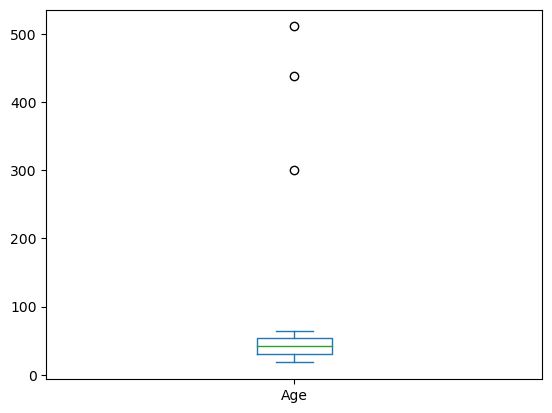

In [12]:
data["Age"].plot(kind='box')

In [13]:
data['Age']=data['Age'].fillna(data['Age'].median())

C:\Users\radia\AppData\Local\Temp\ipykernel_18028\1774197499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age']=data['Age'].fillna(data['Age'].median())


In [14]:
data["Age"].isna().sum()

0

In [15]:
outliers=[]
def detect_outlier(insurance):
    threshold=3
    mean_1=np.mean(insurance)
    std_1=np.std(insurance)
    
    for y in insurance:
        z_score=(y-mean_1)/std_1
        if np.abs(z_score)>threshold:
            outliers.append(y)
    return outliers
    

In [16]:
data["Age"]=data["Age"].astype('int')

C:\Users\radia\AppData\Local\Temp\ipykernel_18028\1052348715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"]=data["Age"].astype('int')


In [17]:
data.select_dtypes(include=np.number).apply(detect_outlier)

,Age,Income,Num Children,Temperature,Rating
0,511.0,511.0,511.0,511.0,511.0
1,301.0,301.0,301.0,301.0,301.0
2,438.0,438.0,438.0,438.0,438.0
3,40.0,40.0,40.0,40.0,40.0
4,-3.2,-3.2,-3.2,-3.2,-3.2
5,10.9,10.9,10.9,10.9,10.9


In [18]:
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1=data[col_name].quantile(0.25)
    q3=data[col_name].quantile(0.75)
    iqr=q3-q1
    
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    print("Outliers=",data.loc[(data[col_name]<low)|(data[col_name]>high),col_name] )

Age
Outliers= 7     511
19    301
47    438
Name: Age, dtype: int32
Income
Outliers= Series([], Name: Income, dtype: float64)
Num Children
Outliers= 82    40.0
Name: Num Children, dtype: float64
Temperature
Outliers= Series([], Name: Temperature, dtype: float64)


In [19]:
data=data[~(data["Age"]>100)]

In [20]:
data["Age"].mean()

42.07142857142857

In [21]:
data["Age"].median()

41.5

<Axes: >

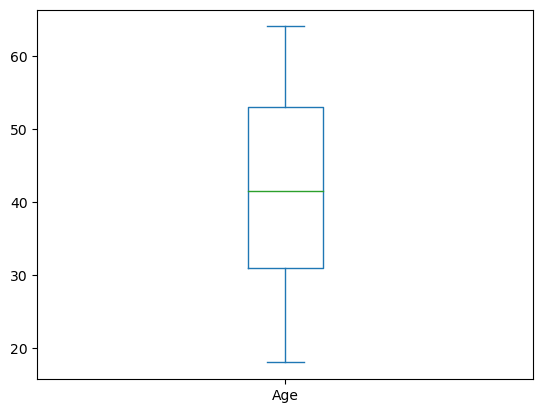

In [22]:
data["Age"].plot(kind="box")

In [24]:
data_num = data.select_dtypes(include = np.number)

In [25]:
data_num

,Age,Income,Num Children,Temperature,Rating
0,43,45893.41,0.0,38.2,2.6
1,56,69663.07,1.0,38.7,3.2
2,42,45124.06,5.0,36.9,3.9
3,37,76724.60,2.0,41.6,2.5
4,53,58343.03,1.0,36.5,3.3
...,...,...,...,...,...
96,48,90964.58,2.0,38.9,3.9
97,58,70679.33,4.0,41.3,4.8
98,50,97052.37,2.0,37.1,4.6
99,42,46673.04,5.0,38.8,10.9
